In [7]:
%pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/106.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/106.6 kB 435.7 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/106.6 kB 330.3 kB/s eta 0:00:01
     ------------------------------------ 106.6/106.6 kB 688.1 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.1 MB 4.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.1 MB 7.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/8.1 MB 11.7 MB/s eta 0:00:01
   ----------------- ------------

# **Estimating the expected number of goals based on difference in elo rating**

We will take the ratings from clubelo.com before the start of the competition and estimate a draw probability based on historic premier league data.  
Begin by loading the historic ratings from `clubelo.com` for all the clubs

In [8]:
import pandas as pd

teams = ["Arsenal", "AstonVilla", "Bournemouth", "Brentford", "Brighton", "Burnley", "Cardiff", "Chelsea", 
         "CrystalPalace", "Everton", "Fulham", "Huddersfield", "Ipswich", "Leeds", "Leicester", "Liverpool", 
         "Luton", "ManCity", "ManUnited", "Middlesbrough", "Newcastle", "Norwich", "Forest", 
         "SheffieldUnited", "Southampton", "Stoke", "Sunderland", "Swansea", "Tottenham", "Watford", 
         "WestBrom", "WestHam", "Wolves"]

ratings = pd.DataFrame()

for team in teams:
    df = pd.read_csv(f"C:/Users/dewae/Downloads/{team}.csv")
    df["From"] = pd.to_datetime(df["From"])
    df["To"] = pd.to_datetime(df["To"])
    ratings = pd.concat([ratings, df], ignore_index=True)

ratings.head()

,Rank,Club,Country,Level,Elo,From,To
0,NaN,Arsenal,ENG,1,1551.140259,1946-07-07,1946-08-31
1,NaN,Arsenal,ENG,1,1539.570068,1946-09-01,1946-09-04
2,NaN,Arsenal,ENG,1,1525.449463,1946-09-05,1946-09-07
3,NaN,Arsenal,ENG,1,1523.855591,1946-09-08,1946-09-11
4,NaN,Arsenal,ENG,1,1518.939331,1946-09-12,1946-09-14


Load last ten seasons of the premier league

In [9]:
fourteen_fifteen = pd.read_csv("C:/Users/dewae/Downloads/14-15.csv")
fifteen_sixteen = pd.read_csv("C:/Users/dewae/Downloads/15-16.csv")
sixteen_seventeen = pd.read_csv("C:/Users/dewae/Downloads/16-17.csv")
seventeen_eighteen = pd.read_csv("C:/Users/dewae/Downloads/17-18.csv")
eighteen_nineteen = pd.read_csv("C:/Users/dewae/Downloads/18-19.csv")
nineteen_twenty = pd.read_csv("C:/Users/dewae/Downloads/19-20.csv")
twenty_twenty_one = pd.read_csv("C:/Users/dewae/Downloads/20-21.csv")
twenty_one_twenty_two = pd.read_csv("C:/Users/dewae/Downloads/21-22.csv")
twenty_two_twenty_three = pd.read_csv("C:/Users/dewae/Downloads/22-23.csv")
twenty_three_twenty_four = pd.read_csv("C:/Users/dewae/Downloads/23-24.csv")


historic_matches = pd.concat([fourteen_fifteen, fifteen_sixteen, sixteen_seventeen, seventeen_eighteen, eighteen_nineteen, nineteen_twenty, twenty_twenty_one, twenty_one_twenty_two, twenty_two_twenty_three, twenty_three_twenty_four], ignore_index=True)

historic_matches.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,08/08/2015,Bournemouth,Aston Villa,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,08/08/2015,Chelsea,Swansea,2,2,D,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,08/08/2015,Everton,Watford,2,2,D,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,08/08/2015,Leicester,Sunderland,4,2,H,3,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,08/08/2015,Man United,Tottenham,1,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform the data in an appropriate format

In [10]:
historic_matches = historic_matches[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG"]]
historic_matches = historic_matches.rename(columns={"FTHG": "HomeGoals", "FTAG": "AwayGoals"})
historic_matches["draw"] = historic_matches["HomeGoals"] == historic_matches["AwayGoals"]
historic_matches["Date"] = pd.to_datetime(historic_matches["Date"], format='mixed', dayfirst=True)
historic_matches.head()

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,draw
0,2015-08-08,Bournemouth,Aston Villa,0,1,False
1,2015-08-08,Chelsea,Swansea,2,2,True
2,2015-08-08,Everton,Watford,2,2,True
3,2015-08-08,Leicester,Sunderland,4,2,False
4,2015-08-08,Man United,Tottenham,1,0,False


Combine the historic matches with the historic ratings  


In [11]:
# create a function that gets the elo rating for a team on a given date
def get_elo(team, date): 
    relevant = ratings[(ratings["Club"] == team) & (ratings["From"] <= date) & (ratings["To"] >= date)]
    if not relevant.empty:
        return relevant.iloc[0]["Elo"]
    return None

# apply the function
historic_matches["HomeElo"] = historic_matches.apply(lambda x: get_elo(x["HomeTeam"], x["Date"]), axis=1)
historic_matches["AwayElo"] = historic_matches.apply(lambda x: get_elo(x["AwayTeam"], x["Date"]), axis=1)

historic_matches.head()

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,draw,HomeElo,AwayElo
0,2015-08-08,Bournemouth,Aston Villa,0,1,False,1594.601929,1577.901123
1,2015-08-08,Chelsea,Swansea,2,2,True,1890.962891,1670.608276
2,2015-08-08,Everton,Watford,2,2,True,1706.561157,1574.087280
3,2015-08-08,Leicester,Sunderland,4,2,False,1633.624390,1605.132446
4,2015-08-08,Man United,Tottenham,1,0,False,1810.338257,1730.680176


Add the win probability of the home team based on the difference in elo rating

In [12]:
historic_matches["rating_difference"] = historic_matches["HomeElo"] + 0 - historic_matches["AwayElo"]
historic_matches["winning_probability"] = 1/(1 + 10**(historic_matches["rating_difference"]/-400))
historic_matches = historic_matches.dropna()
historic_matches.head()

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,draw,HomeElo,AwayElo,rating_difference,winning_probability
0,2015-08-08,Bournemouth,Aston Villa,0,1,False,1594.601929,1577.901123,16.700806,0.524016
1,2015-08-08,Chelsea,Swansea,2,2,True,1890.962891,1670.608276,220.354614,0.780480
2,2015-08-08,Everton,Watford,2,2,True,1706.561157,1574.087280,132.473877,0.681914
3,2015-08-08,Leicester,Sunderland,4,2,False,1633.624390,1605.132446,28.491943,0.540912
4,2015-08-08,Man United,Tottenham,1,0,False,1810.338257,1730.680176,79.658081,0.612670


Fit a polynomial regression to map the rating difference to the expected goals

In [13]:
df = historic_matches[["HomeGoals", "AwayGoals", "winning_probability"]]

In [17]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.Collecting sklearn
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


c:\Users\dewae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


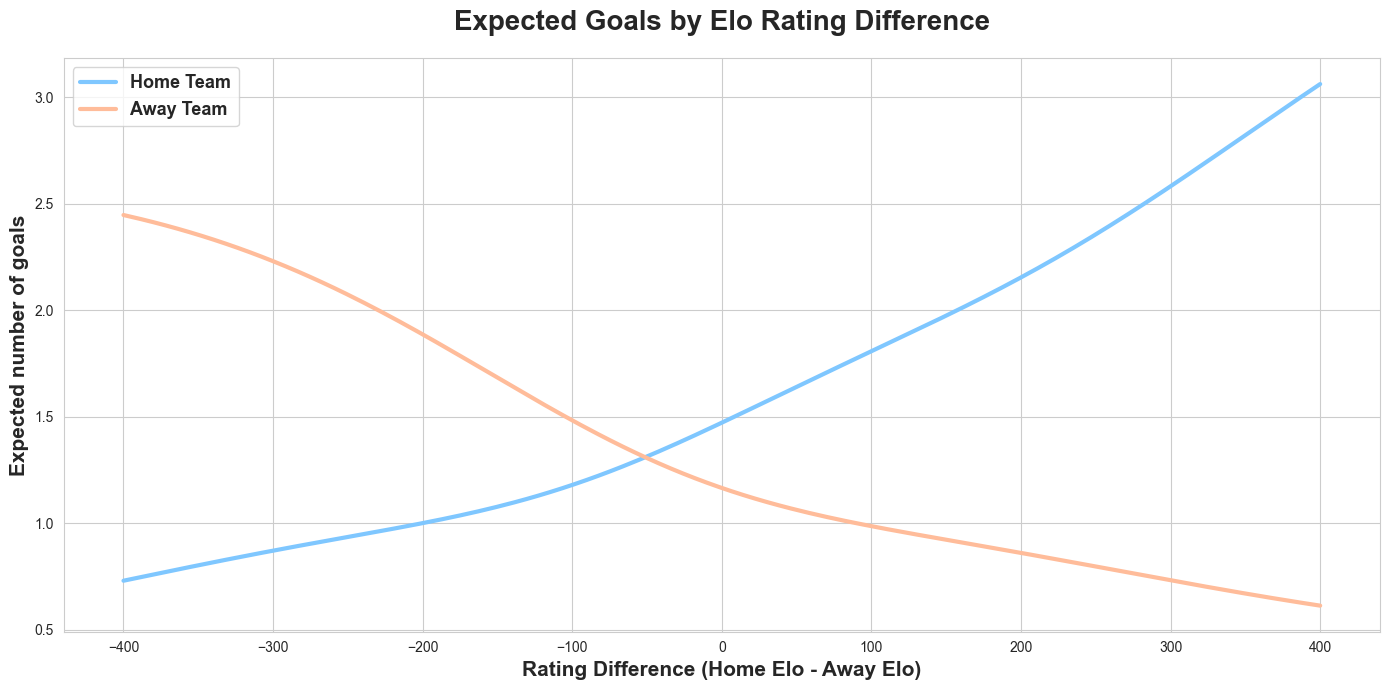

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# === Load your data ===
# Assumes df has: HomeGoals, AwayGoals, winning_probability
# df = pd.read_csv("your_data.csv")

# Step 1: Create polynomial features
X = df[["winning_probability"]]
y_home = df["HomeGoals"]
y_away = df["AwayGoals"]

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Step 2: Train regression models
model_home = LinearRegression().fit(X_poly, y_home)
model_away = LinearRegression().fit(X_poly, y_away)

# Step 3: Predict across a range of EloDiff
elo_diffs = np.linspace(-400, 400, 200)
win_probs = 1 / (1 + 10 ** (-elo_diffs / 400))
X_range_poly = poly.transform(win_probs.reshape(-1, 1))
y_home_pred = model_home.predict(X_range_poly)
y_away_pred = model_away.predict(X_range_poly)

# === Step 4: Beautiful plot ===
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Font config (will only work if Arial is available on your system)
plt.rcParams.update({
    "font.family": "Arial",
    "axes.titlesize": 20,
    
    "axes.labelsize": 15,
    "axes.labelweight": "bold",
    "legend.fontsize": 13,
    "legend.title_fontsize": 14
})

# Plot curves
plt.plot(elo_diffs, y_home_pred, label="Home Team", color="#7FC7FF", linewidth=3)
plt.plot(elo_diffs, y_away_pred, label="Away Team", color="#FFBC9A", linewidth=3)

# Titles and labels
plt.title("Expected Goals by Elo Rating Difference", pad=20, weight="bold")
plt.xlabel("Rating Difference (Home Elo - Away Elo)")
plt.ylabel("Expected number of goals")

# Legend in bold
legend = plt.legend(loc="upper left", frameon=True)
for text in legend.get_texts():
    text.set_weight("bold")

plt.tight_layout()
plt.show()


In [ ]:
# get the output of the model 
# Print home team regression parameters
print("Home Team Polynomial Coefficients:")
for degree, coef in enumerate(model_home.coef_):
    print(f"Degree {degree}: {coef:.5f}")
print(f"Intercept: {model_home.intercept_:.5f}\n")

# Print away team regression parameters
print("Away Team Polynomial Coefficients:")
for degree, coef in enumerate(model_away.coef_):
    print(f"Degree {degree}: {coef:.5f}")
print(f"Intercept: {model_away.intercept_:.5f}")


Home Team Polynomial Coefficients:
Degree 0: 0.00000
Degree 1: 7.44861
Degree 2: -34.68423
Degree 3: 89.64274
Degree 4: -103.75235
Degree 5: 45.39971
Intercept: 0.28004

Away Team Polynomial Coefficients:
Degree 0: 0.00000
Degree 1: -1.40135
Degree 2: -15.35034
Degree 3: 39.28812
Degree 4: -35.34970
Degree 5: 10.51070
Intercept: 2.67454


In [26]:
import numpy as np

w = 0.426789
delta = 400 * np.log10(1/w - 1)
print(f"Δ = {delta:.1f} Elo points")


Δ = 51.2 Elo points


In [22]:
import numpy as np

# Coefficients for Home Team polynomial, highest degree first:
home_coeffs = [45.39971, -103.75235, 89.64274, -34.68423, 7.44861, 0.28004]

# Coefficients for Away Team polynomial, highest degree first:
away_coeffs = [10.51070, -35.34970, 39.28812, -15.35034, -1.40135, 2.67454]

# Compute the difference polynomial (home - away):
diff_coeffs = np.polysub(home_coeffs, away_coeffs)

# Find all roots of the difference:
roots = np.roots(diff_coeffs)

# Filter to keep only the real intersections (within some tolerance):
real_roots = [r.real for r in roots if abs(r.imag) < 1e-6]

print("Intersection x-values:")
for x in real_roots:
    print(f"{x:.6f}")


Intersection x-values:
0.426789


## **Get ratings at the beginning of the 2024-2025 PL**
Take the rating of 9 august 2024, which represents the start of the competition


In [ ]:
current_teams = ["Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Chelsea", "Crystal Palace", "Everton", "Fulham", "Ipswich", "Leicester", "Liverpool", "Man City", "Man United", "Newcastle", "Forest", "Southampton", "Tottenham", "West Ham", "Wolves"]
len(current_teams)

20

In [ ]:
ratings["Club"].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Ipswich', 'Leeds', 'Leicester',
       'Liverpool', 'Luton', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', 'Forest', 'Sheffield United',
       'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'West Ham', 'Wolves'], dtype=object)

In [ ]:
start_of_competition_ratings = {}

for team in current_teams: 
    rating = get_elo(team, pd.to_datetime("2024-08-09"))
    start_of_competition_ratings[team] = rating

In [ ]:
start_of_competition_ratings

{'Arsenal': np.float64(1946.90283203),
 'Aston Villa': np.float64(1770.43505859),
 'Bournemouth': np.float64(1691.12365723),
 'Brentford': np.float64(1711.08398438),
 'Brighton': np.float64(1713.16320801),
 'Chelsea': np.float64(1810.11962891),
 'Crystal Palace': np.float64(1759.70800781),
 'Everton': np.float64(1706.85083008),
 'Fulham': np.float64(1716.27636719),
 'Ipswich': np.float64(1568.32556152),
 'Leicester': np.float64(1643.66943359),
 'Liverpool': np.float64(1900.68835449),
 'Man City': np.float64(2050.57299805),
 'Man United': np.float64(1779.04394531),
 'Newcastle': np.float64(1801.79711914),
 'Forest': np.float64(1647.71496582),
 'Southampton': np.float64(1599.60339355),
 'Tottenham': np.float64(1790.55664062),
 'West Ham': np.float64(1726.24291992),
 'Wolves': np.float64(1677.86230469)}

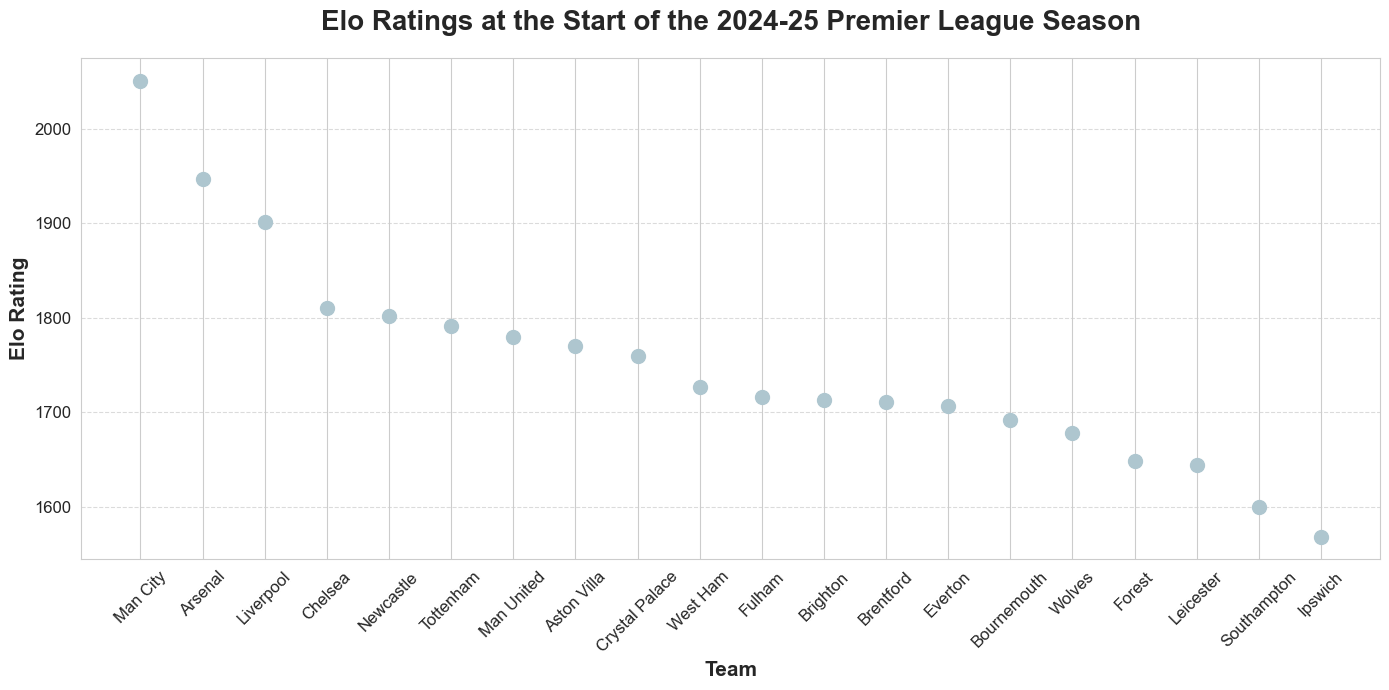

In [ ]:
# Sort Elo ratings from high to low
sorted_ratings = dict(sorted(start_of_competition_ratings.items(), key=lambda item: item[1], reverse=True))

# Scatter plot of Elo ratings
plt.figure(figsize=(14, 7))

# Set font to Arial
plt.rcParams.update({
    "font.family": "Arial",
    "axes.titlesize": 20,
    "axes.labelsize": 15,
    "axes.labelweight": "bold",
    "legend.fontsize": 13,
    "legend.title_fontsize": 14
})

# Use pastel color for the scatter plot
plt.scatter(list(sorted_ratings.keys()), list(sorted_ratings.values()), color="#AEC6CF", s=100)  # Light pastel blue
plt.title("Elo Ratings at the Start of the 2024-25 Premier League Season", pad=20, weight="bold")
plt.xlabel("Team")
plt.ylabel("Elo Rating")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Champions League Ratings**

In [ ]:
cl_games = pd.read_csv("C:/Users/dewae/Documents/school/thesis/cppCode/champions_league_games.csv")

In [ ]:
cl_games 

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171
...,...,...,...,...,...,...,...,...,...
349,350.0,KR Reykjavík,6,0,0,6,7:35,-28,-28
350,351.0,Keflavík ÍF,8,0,0,8,5:35,-30,-30
351,352.0,Stade Dudelange,4,0,0,4,1:32,-31,-31
352,353.0,Union Luxembourg,8,0,0,8,2:39,-37,-37


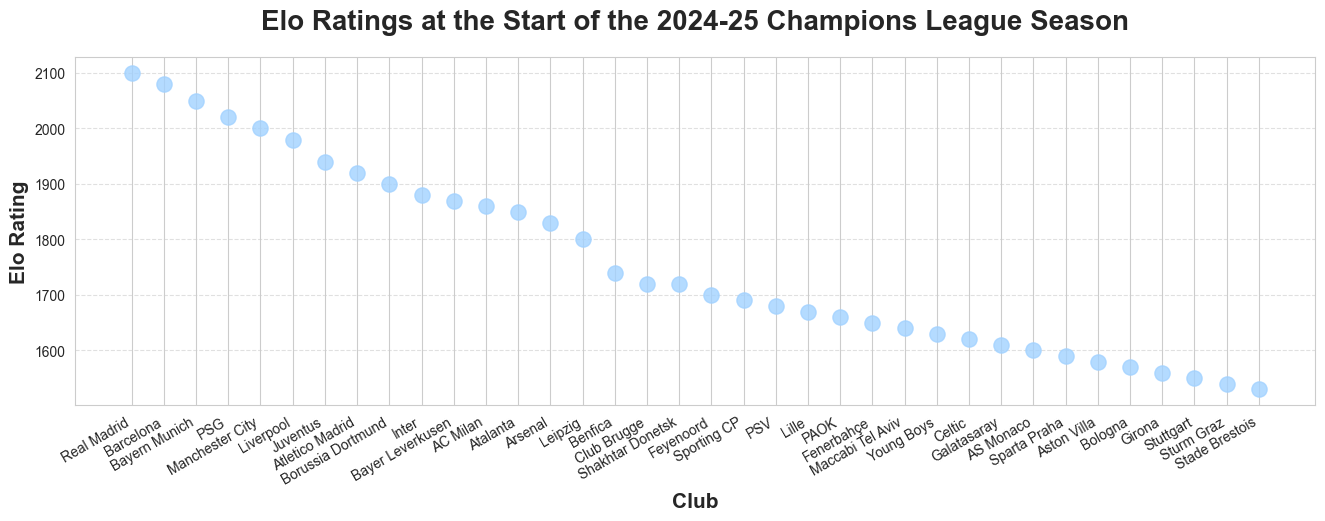

In [33]:
import matplotlib.pyplot as plt

# Data: (Pot, Elo rating, Country)
club_data = {
    "Manchester City": (1, 2000, "England"),
    "Bayern Munich":   (1, 2050, "Germany"),
    "Real Madrid":     (1, 2100, "Spain"),
    "PSG":             (1, 2020, "France"),
    "Liverpool":       (1, 1980, "England"),
    "Inter":           (1, 1880, "Italy"),
    "Borussia Dortmund": (1, 1900, "Germany"),
    "Leipzig":         (1, 1800, "Germany"),
    "Barcelona":       (1, 2080, "Spain"),
    "Bayer Leverkusen": (2, 1870, "Germany"),
    "Atletico Madrid": (2, 1920, "Spain"),
    "Atalanta":        (2, 1850, "Italy"),
    "Juventus":        (2, 1940, "Italy"),
    "Benfica":         (2, 1740, "Portugal"),
    "Arsenal":         (2, 1830, "England"),
    "Club Brugge":     (2, 1720, "Belgium"),
    "Shakhtar Donetsk":(2, 1720, "Ukraine"),
    "AC Milan":        (2, 1860, "Italy"),
    "Feyenoord":       (3, 1700, "Netherlands"),
    "Sporting CP":     (3, 1690, "Portugal"),
    "PSV":             (3, 1680, "Netherlands"),
    "Lille":           (3, 1670, "France"),
    "PAOK":            (3, 1660, "Greece"),
    "Fenerbahçe":      (3, 1650, "Turkey"),
    "Maccabi Tel Aviv":(3, 1640, "Israel"),
    "Young Boys":      (3, 1630, "Switzerland"),
    "Celtic":          (3, 1620, "Scotland"),
    "Galatasaray":     (4, 1610, "Turkey"),
    "AS Monaco":       (4, 1600, "France"),
    "Sparta Praha":    (4, 1590, "Czech Republic"),
    "Aston Villa":     (4, 1580, "England"),
    "Bologna":         (4, 1570, "Italy"),
    "Girona":          (4, 1560, "Spain"),
    "Stuttgart":       (4, 1550, "Germany"),
    "Sturm Graz":      (4, 1540, "Austria"),
    "Stade Brestois":  (4, 1530, "France")
}

# Sort teams by Elo descending
teams   = sorted(club_data, key=lambda t: club_data[t][1], reverse=True)
ratings = [club_data[t][1] for t in teams]

# Plot
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(teams, ratings, color="#a2d2ff", s=120, alpha=0.8)

# Tweak labels: smaller font, 30° rotation, right-aligned
ax.set_xticks(teams)
ax.set_xticklabels(teams, rotation=30, ha='right', fontsize=10)

# Give extra room for the tilted labels
plt.subplots_adjust(bottom=0.3)

# Titles and grid
ax.set_title("Elo Ratings at the Start of the 2024-25 Champions League Season", pad=20, weight="bold")
ax.set_xlabel("Club", weight="bold")
ax.set_ylabel("Elo Rating", weight="bold")
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()